In [1]:
#import of various library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
#reading the liver disease dataset

In [4]:
patients = pd.read_csv('indian_liver_patient.csv')
patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
#reading number of rows and columns

In [7]:
patients.shape

(583, 11)

In [8]:
# renaming male as 1 and female as 0

In [9]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [10]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
#data preprocessing,checking null values

In [12]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [13]:
#finding the mean of column having null values

In [14]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [15]:
#filling the null value of column with the mean value of column

In [16]:
patients=patients.fillna(0.94)

In [17]:
#furthur checking the null value

In [18]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [19]:
#To find Number of patients diagnosed with liver disease and Number of patients not diagnosed with liver disease

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


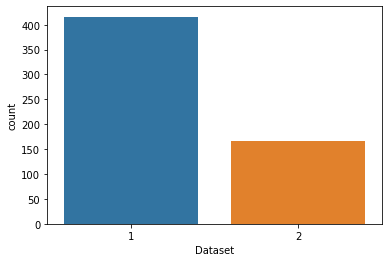

In [20]:
sns.countplot(data=patients, x = 'Dataset', label='Count')

LD, NLD = patients['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)


In [21]:
#count Number of patients that are male and Number of patients that are female

Number of patients that are male:  441
Number of patients that are female:  142


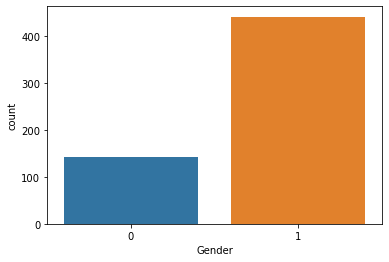

In [22]:
sns.countplot(data=patients, x = 'Gender', label='Count')

M, F = patients['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [23]:
#checking the number of people in different age group

<AxesSubplot:>

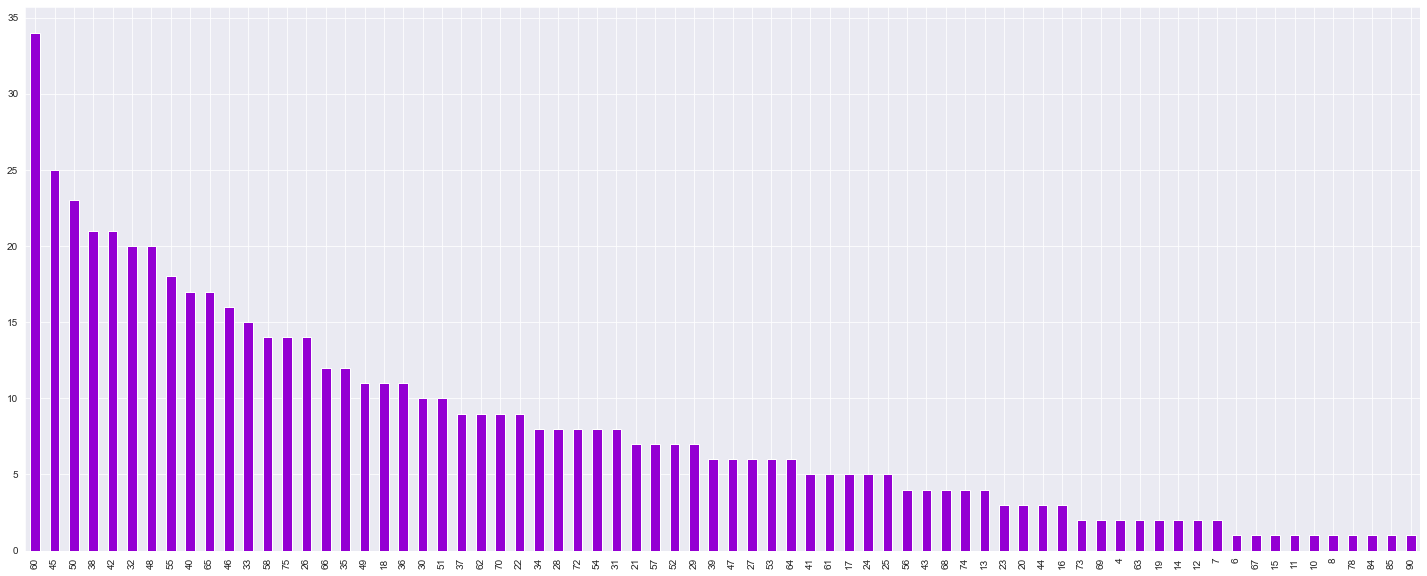

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

In [25]:
patients[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,0,42.740000
3,2,1,40.598291
0,1,0,43.347826
1,1,1,46.950617


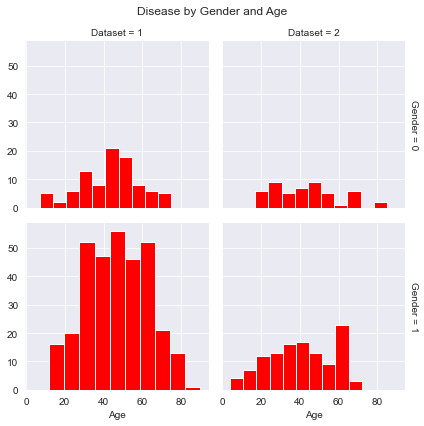

In [26]:
g = sns.FacetGrid(patients, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

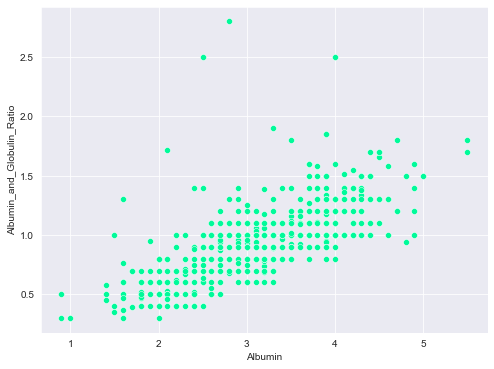

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

<AxesSubplot:xlabel='Gender'>

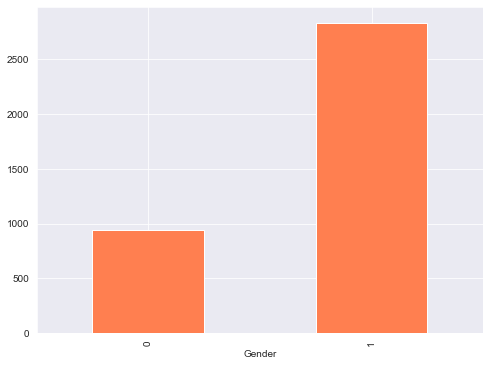

In [28]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<AxesSubplot:xlabel='Gender'>

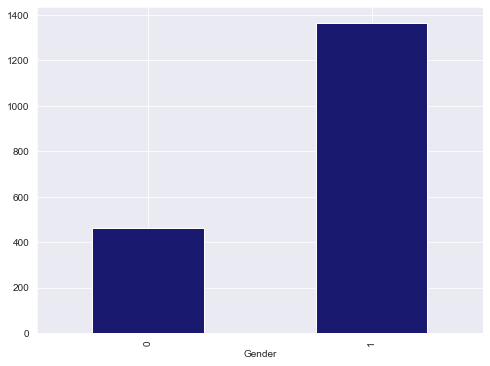

In [29]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<AxesSubplot:xlabel='Gender'>

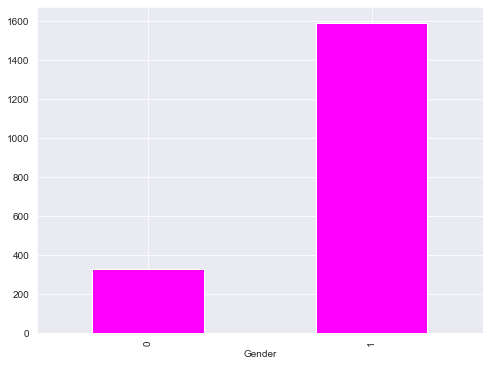

In [30]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

In [31]:
# The input variables/features are all the inputs except GENDER and Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not

In [32]:
X = patients.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [33]:
y = patients['Dataset'] # 1 for liver disease; 2 for no liver disease

In [34]:
corr=X.corr()

In [35]:
corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216039
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206100
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199941
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233888
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002324
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069985
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233873
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686228
Albumin_and_Globulin_Ratio,-0.216039,-0.206100,-0.199941,-0.233888,-0.002324,-0.069985,0.233873,0.686228,1.000000


<AxesSubplot:>

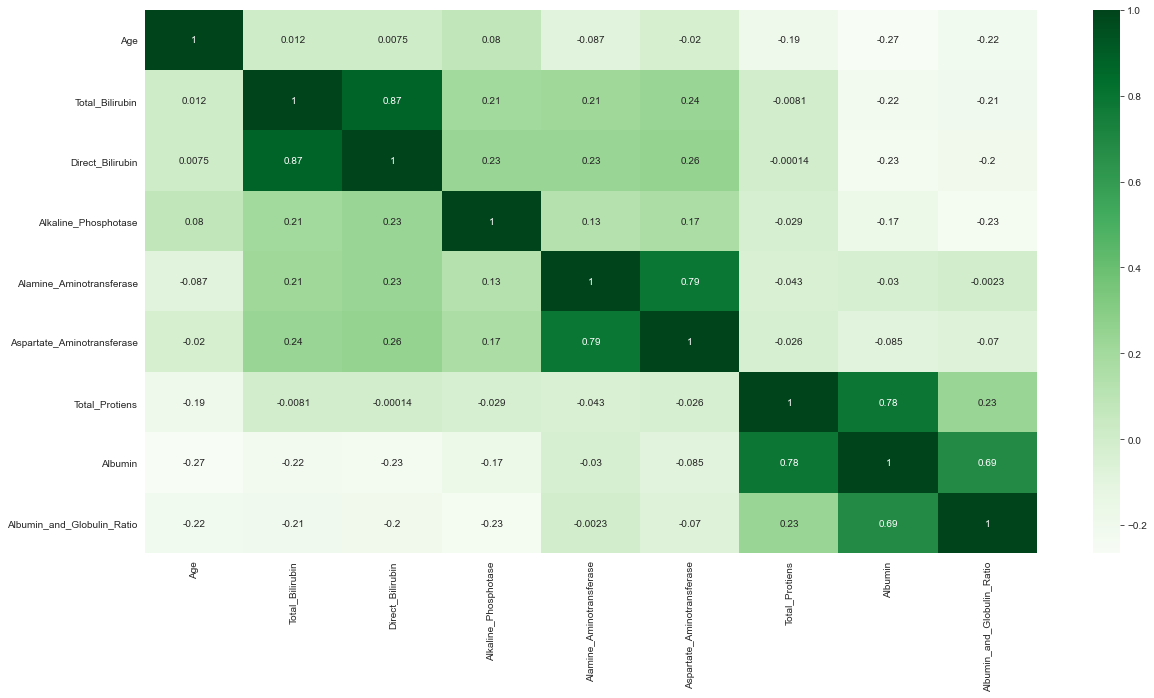

In [36]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=patients[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


***********Logistic Regression Training Score:
 
 72.3
***********Logistic Regression Test Score: 

 73.14
***********Coefficient: 

 [[-0.01778123  0.24736918 -0.87457783 -0.00100806 -0.00828829 -0.00573876
  -0.19211708  0.56028994 -0.31235254]]
***********Accuracy: 

 0.7314285714285714
***********Confusion Matrix: 

 [[118   8]
 [ 39  10]]
***********Classification Report:
 
               precision    recall  f1-score   support

           1       0.75      0.94      0.83       126
           2       0.56      0.20      0.30        49

    accuracy                           0.73       175
   macro avg       0.65      0.57      0.57       175
weighted avg       0.70      0.73      0.68       175



C:\Users\uttam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

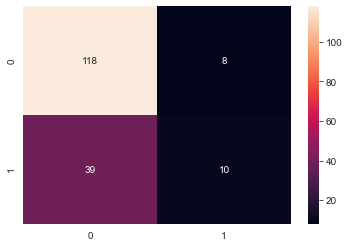

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('***********Logistic Regression Training Score:\n \n', logreg_score)
print('***********Logistic Regression Test Score: \n\n', logreg_score_test)
print('***********Coefficient: \n\n', logreg.coef_)

print('***********Accuracy: \n\n', accuracy_score(y_test,log_predicted))
print('***********Confusion Matrix: \n\n', confusion_matrix(y_test,log_predicted))
print('***********Classification Report:\n \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**********KNN Training Score*******: 
 76.23
**********KNN Test Score **********:
 75.43
**********Accuracy*****************:
 75.43
**********Confusion Matrix*********:
 [[114  12]
 [ 31  18]]
**********Classification Report is:
               precision    recall  f1-score   support

           1       0.79      0.90      0.84       126
           2       0.60      0.37      0.46        49

    accuracy                           0.75       175
   macro avg       0.69      0.64      0.65       175
weighted avg       0.73      0.75      0.73       175



<AxesSubplot:>

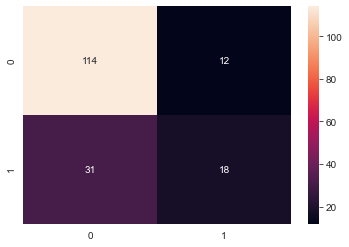

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating KNN object
knn= KNeighborsClassifier(n_neighbors=7)
#Train the model using the training sets and check score
knn.fit(X_train,y_train)
#Predict the Output
y_pred= knn.predict(X_test)
y_score2 = round(knn.score(X_train, y_train) * 100,2)
y_score2_test = round(knn.score(X_test, y_test) * 100,2)
y_accuracy2=round(accuracy_score(y_test,y_pred)*100,2)

print('**********KNN Training Score*******: \n', y_score2)

print('**********KNN Test Score **********:\n', y_score2_test)

print('**********Accuracy*****************:\n', y_accuracy2)

print('**********Confusion Matrix*********:\n',confusion_matrix(y_test,y_pred))

print('**********Classification Report is:\n',classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

**********SVM Training Score: 
 71.08
**********SVM Test Score: 
 72.0
**********Accuracy:
 72.0
**********Confusion Matrix:
 [[126   0]
 [ 49   0]]
**********Classification Report is:
               precision    recall  f1-score   support

           1       0.72      1.00      0.84       126
           2       0.00      0.00      0.00        49

    accuracy                           0.72       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.52      0.72      0.60       175



C:\Users\uttam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uttam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uttam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

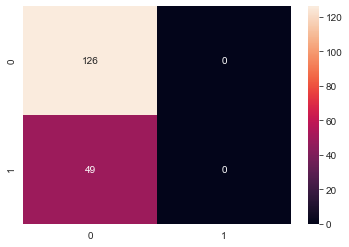

In [42]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating SVM object
svm= SVC(random_state=1)
#Train the model using the training sets and check score
svm.fit(X_train,y_train)
#Predict the Output
y_pred= svm.predict(X_test)
y_score3 = round(svm.score(X_train, y_train) * 100,2)
y_score3_test = round(svm.score(X_test, y_test) * 100,2)
y_accuracy3=round(accuracy_score(y_test,y_pred)*100,2)

print('**********SVM Training Score: \n', y_score3)

print('**********SVM Test Score: \n', y_score3_test)

print('**********Accuracy:\n', y_accuracy3)

print('**********Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

print('**********Classification Report is:\n',classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

************Random Forest Score: 
 100.0
************Random Forest Test Score: 
 74.29
************Accuracy: 
 0.7428571428571429
************CONFUSION MATRIX:
 [[114  12]
 [ 33  16]]
              precision    recall  f1-score   support

           1       0.78      0.90      0.84       126
           2       0.57      0.33      0.42        49

    accuracy                           0.74       175
   macro avg       0.67      0.62      0.63       175
weighted avg       0.72      0.74      0.72       175



<AxesSubplot:>

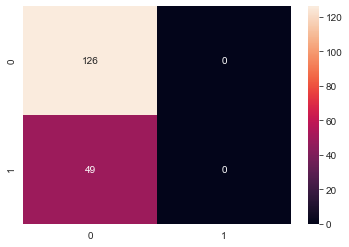

In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('************Random Forest Score: \n', random_forest_score)

print('************Random Forest Test Score: \n', random_forest_score_test)
print('************Accuracy: \n', accuracy_score(y_test,rf_predicted))
print('************CONFUSION MATRIX:\n',confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

*********Decision Tree Training Score: 
 79.66
*********Decision Tree Test Score: 
 65.14
*********Accuracy:
 65.14
*********Confusion Matrix:
 [[103  23]
 [ 38  11]]
*********Classification Report is:
               precision    recall  f1-score   support

           1       0.73      0.82      0.77       126
           2       0.32      0.22      0.27        49

    accuracy                           0.65       175
   macro avg       0.53      0.52      0.52       175
weighted avg       0.62      0.65      0.63       175



<AxesSubplot:>

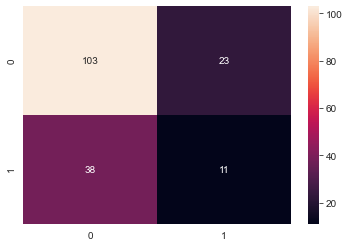

In [44]:
#DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_score5 = round(dtree.score(X_train, y_train) * 100,2)
y_score5_test = round(dtree.score(X_test, y_test) * 100,2)
y_accuracy5=round(accuracy_score(y_test,y_pred)*100,2)

print('*********Decision Tree Training Score: \n', y_score5)

print('*********Decision Tree Test Score: \n', y_score5_test)

print('*********Accuracy:\n', y_accuracy5)

print('*********Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

print('*********Classification Report is:\n',classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

**********GNB Training Score: 
 53.92
**********GNB Test Score: 
 60.0
***********Accuracy:
 60.0
***********Confusion Matrix:
 [[58 68]
 [ 2 47]]
************Classification Report is:
               precision    recall  f1-score   support

           1       0.97      0.46      0.62       126
           2       0.41      0.96      0.57        49

    accuracy                           0.60       175
   macro avg       0.69      0.71      0.60       175
weighted avg       0.81      0.60      0.61       175



<AxesSubplot:>

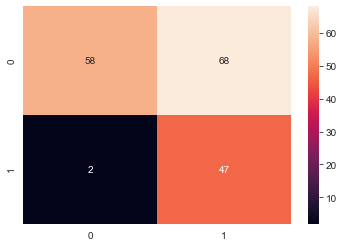

In [45]:
#NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating GNB object
gnb = GaussianNB()
#Train the model using the training sets and check score
gnb.fit(X_train,y_train)
#Predict the Output
y_pred=gnb.predict(X_test)
y_score4 = round(gnb.score(X_train, y_train) * 100,2)
y_score4_test = round(gnb.score(X_test, y_test) * 100,2)
y_accuracy4=round(accuracy_score(y_test,y_pred)*100,2)

print('**********GNB Training Score: \n', y_score4)

print('**********GNB Test Score: \n', y_score4_test)

print('***********Accuracy:\n', y_accuracy4)

print('***********Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

print('************Classification Report is:\n',classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")